In [175]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [176]:
img = plt.imread('city.jpg')

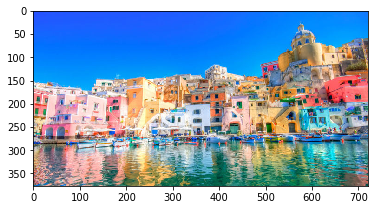

In [177]:
plt.imshow(img)

In [178]:
print(type(img))

<class 'numpy.ndarray'>


In [179]:
original_img_shape = img.shape
print(original_img_shape)

(377, 721, 3)


In [180]:
img = img.reshape((-1,3))

In [181]:
img_shape = img.shape
print(img_shape)

(271817, 3)


In [182]:
img.shape

(271817, 3)

In [183]:
kmeans = KMeans(n_clusters=6)

In [184]:
kmeans.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [185]:
centers = kmeans.cluster_centers_
centers = np.array(centers,dtype='uint8')
print(centers)

[[228 211 204]
 [119 157 170]
 [ 44  99  93]
 [222 156 121]
 [ 10 124 251]
 [147 115  87]]


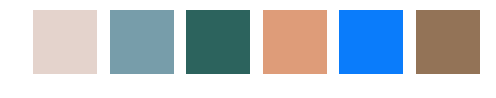

In [186]:
dominant_colors = []
plt.figure(0,figsize=(8,2))

i=1
for center in centers:
    plt.subplot(1,6,i)
    plt.axis('off')
    i+=1
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = center
    dominant_colors.append(center)
    plt.imshow(a)
plt.show()

In [187]:
new_img = np.zeros(img_shape,dtype='uint8')

In [188]:
print(new_img.shape)

(271817, 3)


In [189]:
dominant_colors

[array([228, 211, 204], dtype=uint8),
 array([119, 157, 170], dtype=uint8),
 array([44, 99, 93], dtype=uint8),
 array([222, 156, 121], dtype=uint8),
 array([ 10, 124, 251], dtype=uint8),
 array([147, 115,  87], dtype=uint8)]

In [190]:
kmeans.labels_

array([4, 4, 4, ..., 2, 2, 2])

In [191]:
for i in range(new_img.shape[0]):
    new_img[i] = dominant_colors[kmeans.labels_[i]]


In [192]:
new_img.shape

(271817, 3)

In [193]:
new_img = new_img.reshape(original_img_shape)

In [194]:
new_img.shape

(377, 721, 3)

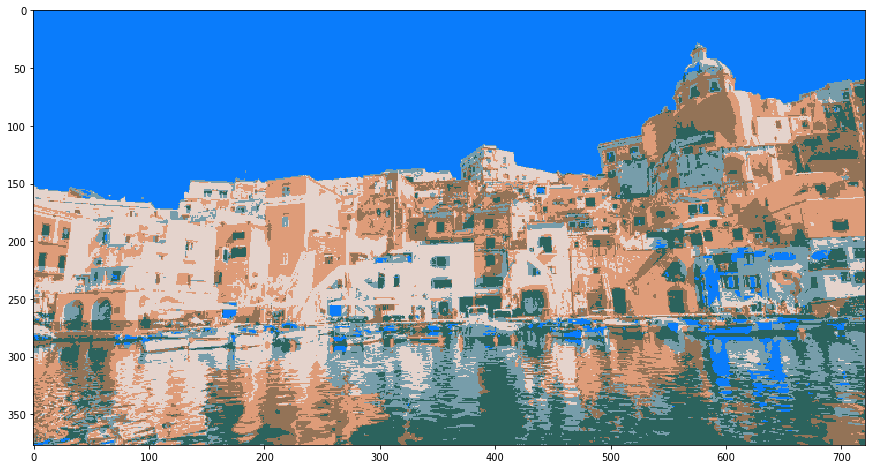

In [195]:
plt.figure(0,figsize=(32,8))
plt.imshow(new_img)